# K-means Clustering 이미지 색상 분할

## 데이터셋

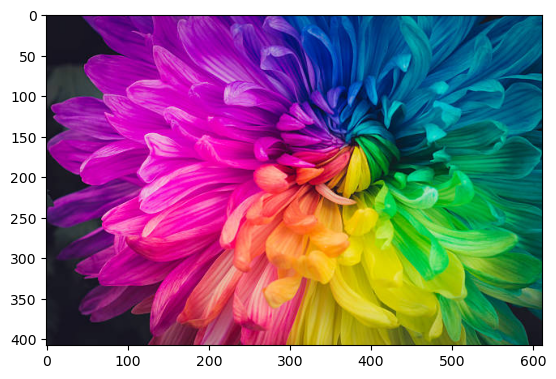

In [24]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

image = imread('./datas/sample.jpg')
plt.imshow(image);

## 색상별로 클러스터링

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


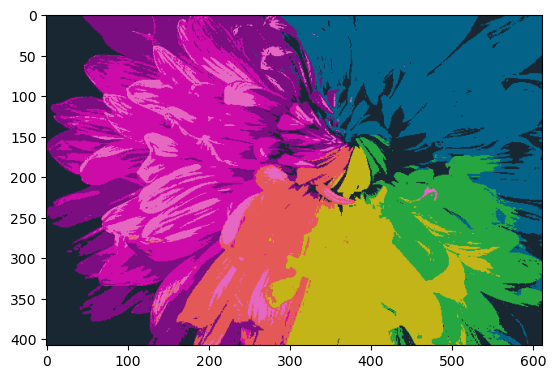

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# RGB 3개의 값을 reshape
X = image.reshape(-1,3)
# 색상을 8개의 군집으로 클러스터링
kmeans = KMeans(n_clusters=8, random_state=13).fit(X)


segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow((segmented_img).astype(np.uint8));

In [38]:
kmeans.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [41]:
kmeans.cluster_centers_[kmeans.labels_]

array([[25.19620219, 39.8031993 , 51.90391207],
       [25.19620219, 39.8031993 , 51.90391207],
       [25.19620219, 39.8031993 , 51.90391207],
       ...,
       [25.19620219, 39.8031993 , 51.90391207],
       [25.19620219, 39.8031993 , 51.90391207],
       [25.19620219, 39.8031993 , 51.90391207]])

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1

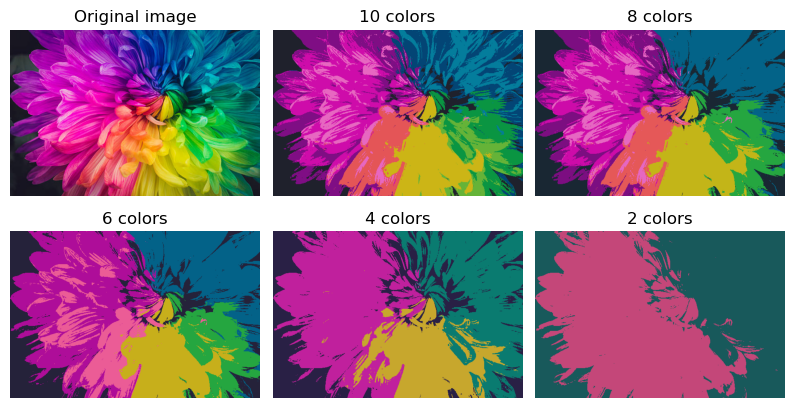

In [46]:
segmented_imgs = []
n_colors = [10, 8, 6, 4, 2]

for n_clusters in n_colors :
    kmeans = KMeans(n_clusters=n_clusters, random_state=13).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors) :
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx].astype(np.uint8))
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()